<a href="https://colab.research.google.com/github/velizhask/PemrosesanBahasaAlami-nlp/blob/main/Sentimen%20Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimen Analisis

In [ ]:
import numpy as np
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# Dataset sederhana
data = {
    'review': [
        "I love this product",
        "This is the best thing ever",
        "I hate this item",
        "Worst purchase I've ever made",
        "I'm so happy with my purchase",
        "This is terrible"
    ],
    'score': [1, 1, 0, 0, 1, 0]  # 1: positif, 0: negatif
}

# Membuat DataFrame
data = pd.DataFrame(data)

Data Prepocessing

In [ ]:
# Fungsi untuk membersihkan teks
def clean_texts(text):
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'(.)\1{1,}', r'\1', text)  # Hapus karakter berulang lebih dari 2 kali
    return text

data['review'] = data['review'].apply(clean_texts)

# Mendapatkan daftar stopwords dalam bahasa Indonesia
sw = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari token-token kata
def remove_stopword(tokens):
    tokens = [word for word in tokens if word not in sw and word not in string.punctuation]
    return tokens

# Inisialisasi lemmatizer dan stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk melakukan preprocessing pada teks (lemmatization dan stemming)
def preprocess_texts(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Menghapus stopwords
    tokens = remove_stopword(tokens)

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]

    # Menggabungkan token yang sudah diproses menjadi satu string kembali
    return ' '.join(stemmed_tokens)

# Contoh penerapan preprocess_text pada kolom 'text'
data['prepoccess_review'] = data['review'].apply(preprocess_texts)
data.head()

## Vader

In [ ]:
!pip install vaderSentiment

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon jika belum diunduh
nltk.download('vader_lexicon')

# Inisialisasi VADER
sia = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan label sentimen dari skor VADER
def analyze_sentimentvader(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound > -0.05 and compound < 0.05:
        return 'neutral'
    else:
        return 'negative'

# Menerapkan sentimen analisis pada kolom prepoccess_review
data['sentiment_vader'] = data['prepoccess_review'].apply(analyze_sentimentvader)

# Menampilkan DataFrame dengan kolom sentimen
data

## TextBlob

In [ ]:
!pip install -U textblob

In [ ]:
from textblob import TextBlob

# Fungsi untuk mengklasifikasikan sentimen
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Menerapkan sentimen analisis pada kolom 'review'
data['sentiment_textblob'] = data['prepoccess_review'].apply(analyze_sentiment)

# Menampilkan DataFrame dengan kolom sentimen
data

## BERT

In [ ]:
!pip install sentence_transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Model pre-trained untuk analisis sentimen bahasa Indonesia
pretrained_model = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model)

# Pipeline untuk analisis sentimen
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label indeks untuk hasil model
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Fungsi untuk klasifikasi sentimen dengan label yang diubah
def classify_sentiment(text):
    result = sentiment_analysis(text)
    label = label_index[result[0]['label']]
    score = result[0]['score']
    return f"{label} ({score * 100:.3f}%)"

# Terapkan analisis sentimen pada kolom 'prepoccess_review' di DataFrame
data['sentiment_bert'] = data['prepoccess_review'].apply(classify_sentiment)
# Tampilkan hasil

data

## **Soal Praktikum:**

*   Silahkan lakukan analisis sentimen menggunakan data masing-masing dengan output berikut:

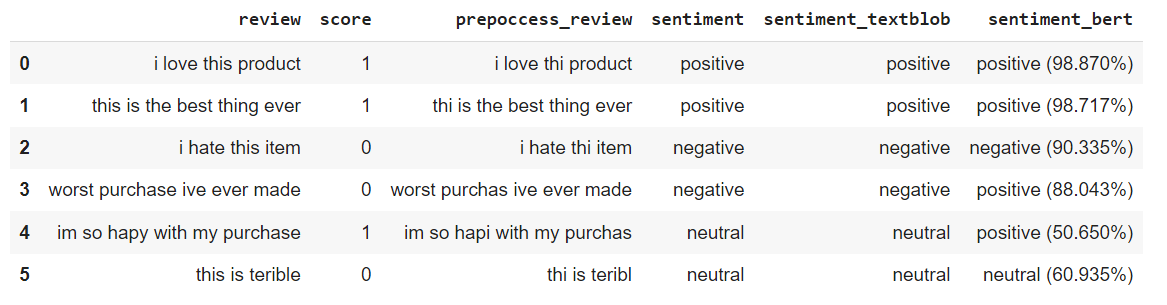



In [ ]:
!kaggle datasets download ucupsedaya/gojek-app-reviews-bahasa-indonesia
!unzip gojek-app-reviews-bahasa-indonesia.zip

In [ ]:
df= pd.read_csv('/content/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')
df.head()

In [ ]:
# Mengambil hanya kolom 'review' dan 'rating'
df = df[['content', 'score']]
df

In [ ]:
df.isnull().sum()

In [ ]:
pd.reset_option('display.max_colwidth')
df = df.dropna()
df = df.drop_duplicates()
df

In [ ]:
!pip install Sastrawi

In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'(.)\1{1,}', r'\1', text)  # Hapus karakter berulang lebih dari 2 kali
    return text

df['prepocess_text'] = df['content'].apply(clean_text)

# Mendapatkan daftar stopwords dalam bahasa Indonesia
sw = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari token-token kata
def remove_stopwords(tokens):
    tokens = [word for word in tokens if word not in sw and word not in string.punctuation]
    return tokens

# Inisialisasi lemmatizer dan stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk melakukan preprocessing pada teks (lemmatization dan stemming)
def preprocess_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Menghapus stopwords
    tokens = remove_stopwords(tokens)

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]

    # Menggabungkan token yang sudah diproses menjadi satu string kembali
    return ' '.join(stemmed_tokens)

# Contoh penerapan preprocess_text pada kolom 'content'
df['prepocess_text'] = df['content'].apply(preprocess_text)
df.head()

`TextBlob`

In [ ]:
from textblob import TextBlob

# Contoh data review dari dataset yang diberikan
data = df['content']

# Fungsi untuk mengklasifikasikan sentimen
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Menerapkan sentimen analisis pada kolom content
df['sentiment_vader'] = df['content'].apply(analyze_sentiment)

# Menampilkan DataFrame dengan kolom sentimen
df


`Vader`

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon jika belum diunduh
nltk.download('vader_lexicon')

# Inisialisasi VADER
sia = SentimentIntensityAnalyzer()

# Contoh data review dari dataset
data = df['content']

# Fungsi untuk mendapatkan label sentimen dari skor VADER
def analyze_sentiment_vader(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound > -0.05 and compound < 0.05:
        return 'neutral'
    else:
        return 'negative'

# Menerapkan sentimen analisis pada kolom content
df['sentiment_blob'] = df['content'].apply(analyze_sentiment_vader)

# Menampilkan DataFrame dengan kolom sentimen
df

`BERT`

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Model pre-trained untuk sentimen analisis bahasa Indonesia
pretrained_model = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model)

# Pipeline untuk sentimen analisis
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label indeks untuk hasil model
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Fungsi untuk klasifikasi sentimen dengan label yang diubah
def classify_sentiment(text):
    result = sentiment_analysis(text)
    label = label_index[result[0]['label']]
    score = result[0]['score']
    return f"{label} ({score * 100:.3f}%)"

# Terapkan analisis sentimen pada kolom 'text' di DataFrame
df['sentiment_bert'] = df['prepocess_text'].apply(classify_sentiment)

# Tampilkan hasil
df